In [1]:
import pandas as pd
import json
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Sort Data by Timestamp
tweet_raw_file_dir = "C:\\Users\\jesse\\Desktop\\DDHW\\Testing\\01-Tweet_Data\\20231023_merged_data_Bitcoin.csv"
df = pd.read_csv(tweet_raw_file_dir)

# Convert the "Timestamp" column to datetime format, allowing inference of formats
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Drop rows with invalid dates (NaT)
df = df.dropna(subset=['Timestamp'])

# Sort the DataFrame by Timestamp
df = df.sort_values(by='Timestamp')
df.head(len(df))

,Timestamp,Username,Tweet Content,Retweets,Likes,Replies,scores
216,2023-10-10,krakenfx,@Bitcoin Bitcoin rocks 🧡 🙌,2,14,8,0.938087
64,2023-10-10,Bitcoin,#Bitcoin: where innovation meets decentralizat...,480,1772,198,0.714894
65,2023-10-10,Bitcoin,#Bitcoin is a beacon of hope in the financial ...,387,1292,216,0.619403
87,2023-10-10,DocumentingBTC,"Paul T. Jones is worth $8,100,000,000 and pion...",911,3930,151,0.800349
88,2023-10-10,DocumentingBTC,"Fidelity @DigitalAssets Research Study\n\n""Bit...",34,201,11,0.010538
...,...,...,...,...,...,...,...
230,2023-10-20,krakenfx,@saylor Always bullish for #Bitcoin 🧡 💪,0,17,4,0.930112
234,2023-10-23,krakenfx,We're so back? #Bitcoin,17,197,75,0.606114
233,2023-10-23,krakenfx,@NGCR_LTD Bitcoin on top 🧡,1,3,0,0.527573
232,2023-10-23,krakenfx,@PsPsCrypto Bitcoin brings the heat 😉 👌,0,2,1,0.748703


In [2]:
# Step 2: Calculate Sentiment Index
df['Sentiment_Index'] = (df['Likes'] + df['Replies'] + df['Retweets']) * df['scores']

# Step 3: Group Data by Date and Sum Sentiment_Index
# Extract the date from the 'Timestamp' column
df['Date'] = df['Timestamp'].dt.date

# Group the data by date and sum the 'Sentiment_Index' for each date
processed_data = df.groupby('Date')['Sentiment_Index'].sum().reset_index()

# Step 4: Create and Save Processed Data with a Specified Filename
target_directory = "C:\\Users\\jesse\\Desktop\\DDHW\\Testing\\03-Merged\\"
final_file_path = target_directory + 'processed_sentiment_index_by_date.csv'

# Save the processed data to a new CSV file without index column
processed_data.to_csv(final_file_path, index=False)

df = pd.read_csv(final_file_path)
df.head(len(df))

,Date,Sentiment_Index
0,2023-10-10,16308.429578
1,2023-10-11,7257.557818
2,2023-10-12,6491.537313
3,2023-10-13,16396.365827
4,2023-10-14,5672.037407
5,2023-10-15,11545.339453
6,2023-10-16,16393.149622
7,2023-10-17,6015.263397
8,2023-10-19,52.084467
9,2023-10-20,19.532358


In [3]:
# Convert JSON data to CSV

# Read JSON data from a file
bitcoin_price_file_dir = "C:\\Users\\jesse\\Desktop\\DDHW\\Testing\\02-BTC_Price\\market-price.json"
with open(bitcoin_price_file_dir, 'r') as file:
    json_data = file.read()

# Parse JSON data
data = json.loads(json_data)

# Extract 'Date' and 'Price' data
price_data = data.get('market-price', [])
date_price_data = [{'Date': datetime.fromtimestamp(item['x'] / 1000).strftime('%Y-%m-%d'), 'Price': item['y']} for item in price_data]

# Create a DataFrame
df = pd.DataFrame(date_price_data)

# Define the directory where you want to save the CSV file
output_directory = "C:\\Users\\jesse\\Desktop\\DDHW\\Testing\\02-BTC_Price\\"

# Construct the full file path for the CSV file, using the JSON file's name
json_filename = bitcoin_price_file_dir.split("\\")[-1]  # Get the JSON file name
csv_filename = output_directory + json_filename.replace(".json", ".csv")  # Replace the extension

# Save DataFrame as a CSV file
df.to_csv(csv_filename, index=False)

In [4]:
bitcoin_price_file_dir = "C:\\Users\\jesse\\Desktop\\DDHW\\Testing\\02-BTC_Price\\market-price.csv"
df = pd.read_csv(bitcoin_price_file_dir)
df.head(len(df))

,Date,Price
0,2023-07-27,29344.56
1,2023-07-28,29213.94
2,2023-07-29,29316.12
3,2023-07-30,29359.89
4,2023-07-31,29274.94
...,...,...
85,2023-10-20,28723.49
86,2023-10-21,29682.60
87,2023-10-22,29921.68
88,2023-10-23,29990.73


In [5]:
# Step 5: Merge Sentiment_Index with Price_Next_Day

# Read data from both files
sentiment_df = pd.read_csv(final_file_path)
bitcoin_df = pd.read_csv(bitcoin_price_file_dir)

# Convert date columns to datetime format for consistency
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])

# Shift the Bitcoin price values by one day to create the "price_next_day" column
bitcoin_df['Price'] = bitcoin_df['Price'].shift(-1)  # Shift prices by one day

# Merge data based on the 'Date' column
merged_df = sentiment_df.merge(bitcoin_df, on='Date', how='left')

# Overwrite the existing file with the merged data
merged_df.to_csv(final_file_path, index=False)

df = df = pd.read_csv(final_file_path)
df.head(len(df))

,Date,Sentiment_Index,Price
0,2023-10-10,16308.429578,27395.65
1,2023-10-11,7257.557818,26867.79
2,2023-10-12,6491.537313,26758.66
3,2023-10-13,16396.365827,26866.51
4,2023-10-14,5672.037407,26855.89
5,2023-10-15,11545.339453,27167.87
6,2023-10-16,16393.149622,28517.32
7,2023-10-17,6015.263397,28413.17
8,2023-10-19,52.084467,28723.49
9,2023-10-20,19.532358,29682.60


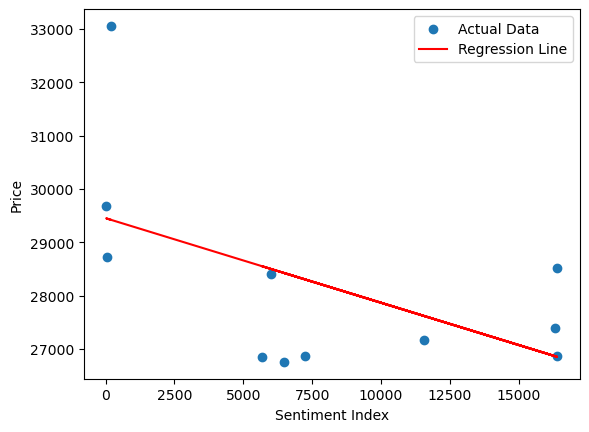

In [6]:
# Read your dataset into a pandas DataFrame
data = pd.read_csv(final_file_path)

# Define the independent (X) and dependent (y) variables
X = data['Sentiment_Index'].values.reshape(-1, 1)
y = data['Price'].values

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Visualize the data and regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Sentiment Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
beta_0 = model.intercept_
beta_1 = model.coef_[0]
epsilon = y - y_pred

print(f'Intercept (beta_0): {beta_0}')
print(f'Slope (beta_1): {beta_1}')
print(f'Residuals (epsilon): {epsilon}')

Intercept (beta_0): 29454.219362012147
Slope (beta_1): -0.15854184445601793
Residuals (epsilon): [  526.9991435  -1435.80275937 -1666.37906307    11.80071865
 -1699.07408961  -455.92995029  1662.1008155    -87.3784081
  -722.47179453   231.4773341   3634.65805322]
